# Introducción:


---


Este análisis se centra en la calidad del vino, evaluando diferentes características químicas y su impacto en la clasificación de la calidad. Se utilizan técnicas de limpieza, normalización, y modelado para explorar cómo estos factores influyen en la predicción de la calidad del vino.

## Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> Cargamos la data

In [3]:
ruta = "/content/drive/MyDrive/Project_colab/data/winequalityN.csv"
df = pd.read_csv(ruta, sep=",")

In [4]:
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# valores nulos?

In [5]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


# Elimino los valores faltantes


In [6]:
df.dropna(inplace=True)
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


# Estadisticas

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#  Matriz de correlacion

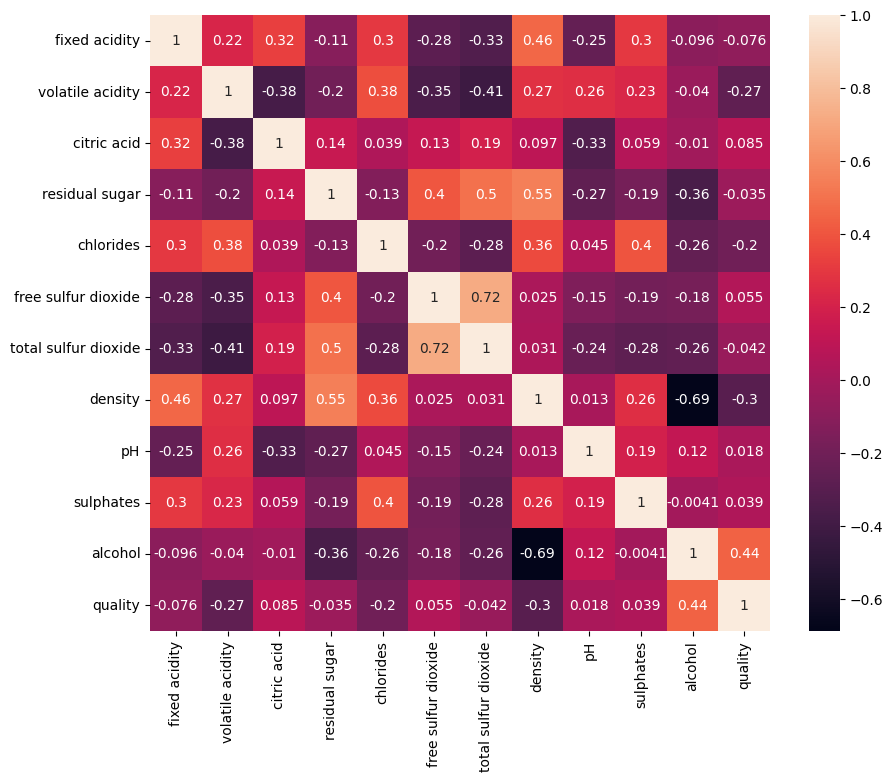

In [9]:
# Selecciona solo las columnas numéricas
df_numerical = df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación con las columnas numéricas
# Tenia un problema con la variable type porque es categorica
corr = df_numerical.corr()

# Graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

<ipython-input-10-82c4a9ee7b7b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette='tab10')


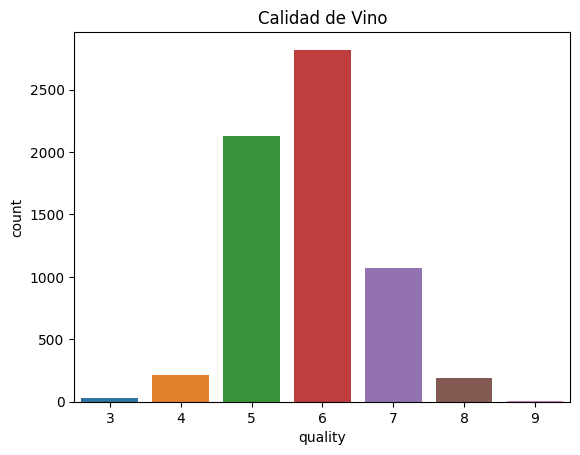

In [10]:
sns.countplot(data=df, x='quality', palette='tab10')
plt.title("Calidad de Vino")
plt.show()

<ipython-input-11-b54c1b735276>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='quality', y='alcohol', palette='tab10',errorbar=None, legend=False)


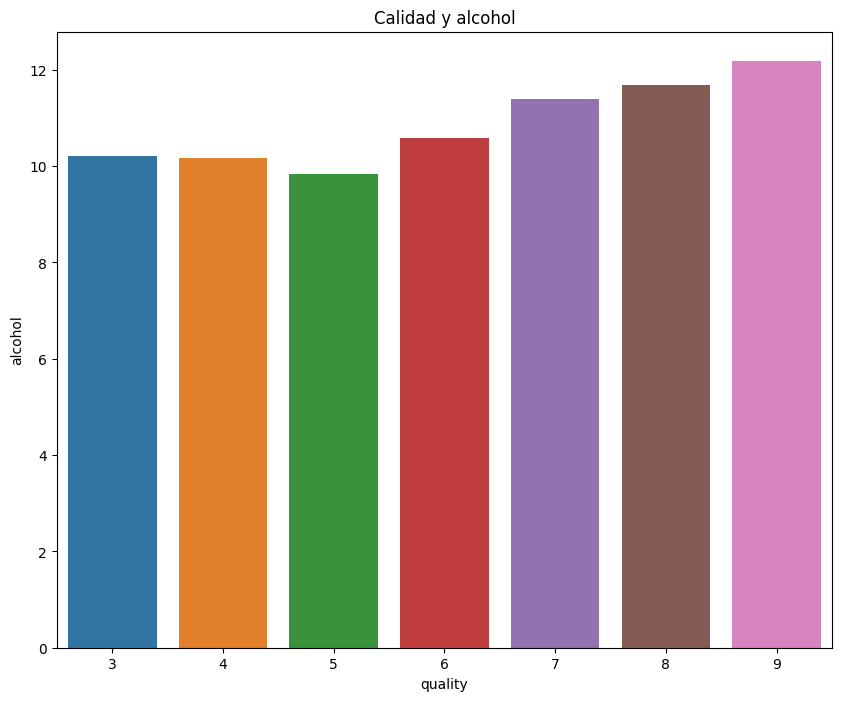

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Calidad y alcohol")
sns.barplot(data=df, x='quality', y='alcohol', palette='tab10',errorbar=None, legend=False)
plt.show()

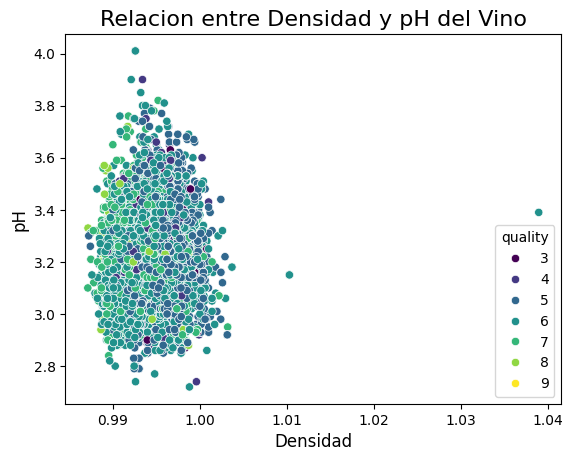

In [12]:
sns.scatterplot(data=df, x='density', y='pH', hue='quality', palette='viridis')

plt.title('Relacion entre Densidad y pH del Vino', fontsize=16)
plt.xlabel('Densidad', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.show()

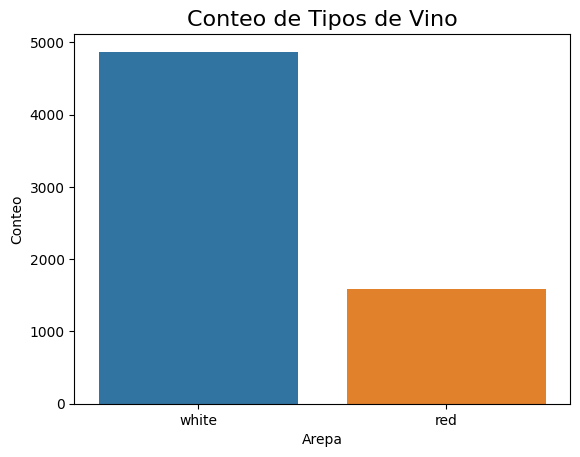

In [13]:
sns.countplot(data=df, x='type', hue='type', palette='tab10', legend=False)
plt.title('Conteo de Tipos de Vino', fontsize=16)
plt.xlabel('Arepa')
plt.ylabel('Conteo')
plt.show()

In [14]:
df.shape

(6463, 13)

In [30]:
# Normalizacion
from sklearn.preprocessing import MinMaxScaler
# Metricas /para saber si el modelo funciona
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score,classification_report
# Separar la data
from sklearn.model_selection import train_test_split
# Para tratar con conjuntos de datos desequilibrados
from imblearn.over_sampling import SMOTE
# Modelo
from sklearn.ensemble import RandomForestClassifier


Division

In [17]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

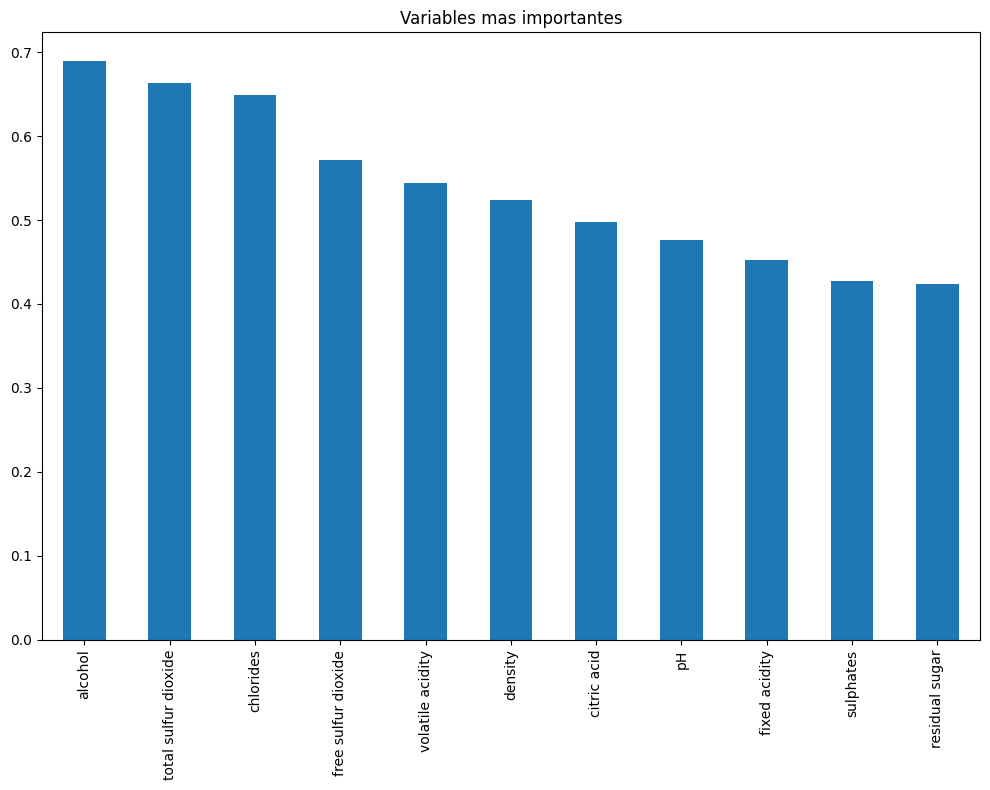

In [47]:
from sklearn.feature_selection import mutual_info_classif
#
ml_scores = mutual_info_classif(X, y)
# lo vuelvo en dataframe
ml_scores = pd.Series(ml_scores, name="ML Scores", index=X.columns)
# ordeno
ml_scores = ml_scores.sort_values(ascending=False)
# Grafico
plt.figure(figsize=(10, 8))
ml_scores.plot.bar()
plt.title('Variables mas importantes')
plt.tight_layout()
plt.show()

# Estandarizamos la data ya que existen desbalaceados

> la clase predictora esta desbalaceada.


In [19]:
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [20]:
y.value_counts()

,count
quality,
6,2820
5,2820
7,2820
8,2820
4,2820
3,2820
9,2820


In [22]:
# Dividimos la data
# Entremiento 70% y test 30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

# Modelos

- Probaremos varios modelos

In [23]:
# Ya la data esta limpia, balaceada y lista para el modelo.
# Definimos el modelo este casos RandomForest
model = RandomForestClassifier()
# Le pasamos la data de entrenamiento para que aprenda
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
# Importamos libreria para hacer validacion cruzada
from sklearn.model_selection import cross_val_score
# Acurracacy(Exactitud del modelo)
print("Accuracy:", model.score(X_test, y_test) * 100)
# cross-validation(validacion cruzada)
score = cross_val_score(model, X, y, cv=5)
print("CV Score:", np.mean(score)*100)

Accuracy: 88.28774062816616
CV Score: 82.52786220871329


# Conclusión:
En conclusion el modelo Random Forest logró un accuracy del 88% y un CV Score del 82% a la hora de predecir la calidad de vino. Lo cual lo hace un modelo bueno.






